In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('studentmarks_dataset.csv')

In [4]:
df.head(5)

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [5]:
df.shape

(100, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [8]:
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
df['number_courses'].value_counts()

3    22
4    21
6    16
8    16
7    15
5    10
Name: number_courses, dtype: int64

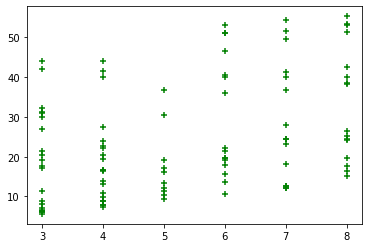

In [12]:
x = df['number_courses']
y = df['Marks']
figure = plt.scatter(x, y, color='green', marker='+', label='Marks')


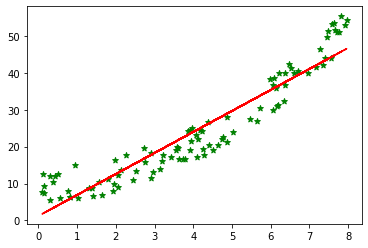

In [13]:
x = df['time_study']
y = df['Marks']
plt.scatter(x, y, color='green', marker='*')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

In [14]:
corre = df.corr()
corre['Marks'].sort_values(ascending=False)

Marks             1.000000
time_study        0.942254
number_courses    0.417335
Name: Marks, dtype: float64

In [15]:
x = np.array(df[['time_study', 'number_courses']])
y - np.array(df['Marks'])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9459936100591212

In [17]:
result = model.predict(np.array([[8, 7.811]]))

In [18]:
print(*result)

49.36460353035039
